This is the preprocessing process

Author: Đỗ Mai Uyển Nhi

Date: 27-May-2024

# Libraries Import and Data reading

In [1]:
# You only need to run this once
# Uncomment the following line to install the required packages:
# pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data preprocessing

In [3]:
# Change the file path to the location of the data file you want to read
file_path = r'scratched_data.csv'
data = pd.read_csv(file_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482649 entries, 0 to 482648
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Gender  482649 non-null  object 
 1   Chest   482649 non-null  int64  
 2   Waist   482649 non-null  int64  
 3   High    482649 non-null  int64  
 4   Hip     482649 non-null  int64  
 5   Shape   482649 non-null  object 
 6   WHR     482649 non-null  float64
 7   Status  482649 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 29.5+ MB


In [4]:
# Check out each nunique value in each column
for column in data.columns:
    print(f'{column}: {data[column].unique()}')

Gender: ['women' 'men']
Chest: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50]
Waist: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40]
High: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50]
Hip: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50]
Shape: ['Rectangle' 'Inverted Triangle' 'Top Hourglass' 'Triangle' 'Hourglass'
 'Bottom Hourglass' 'Spoon']
WHR: [1.   1.07 1.13 1.2  1.27 1.33 0.94 1.06 1.19 1.25 0.88 1.12 1.18 0.83
 0.89 1.11 0.79 0.84 0.95 1.05 0.75 0.8  0.85 0.9  0.91 0.81 0.78 0.72
 0.7  0.68 0.66 0.64 0.62 0.6  0.58 0.57 0.55 0.54 0.53 0.51 0.5  0.49
 0.48 0.47 0.46 0.45 0.44 0.43 0.42 0.96 0.92 0.76 0.73 0.71 0.69 0.67
 0.65 0.63 0.61 0.59 0.56 0.52 1.1  0.82 0.77 0.74 1.14 1.09 1.04 0.86
 0.93 1.24 1.08 0.87 1.29 1.23 1.17 1.35 1.4  1.22 0.97 1.45 1.38 1.3

In [5]:
# See if this dataset is unbalanced
data['Shape'].value_counts()

Shape
Rectangle            102105
Spoon                 94986
Inverted Triangle     92040
Triangle              86550
Top Hourglass         58884
Hourglass             35103
Bottom Hourglass      12981
Name: count, dtype: int64

# Data Cleaning

In [6]:
# Drop unnecessary columns
data = data.drop(columns=['Status'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482649 entries, 0 to 482648
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Gender  482649 non-null  object 
 1   Chest   482649 non-null  int64  
 2   Waist   482649 non-null  int64  
 3   High    482649 non-null  int64  
 4   Hip     482649 non-null  int64  
 5   Shape   482649 non-null  object 
 6   WHR     482649 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 25.8+ MB


In [7]:
# Check out each nunique value in each column
for column in data.columns:
    print(f'{column}: {data[column].unique()}')

Gender: ['women' 'men']
Chest: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50]
Waist: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40]
High: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50]
Hip: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50]
Shape: ['Rectangle' 'Inverted Triangle' 'Top Hourglass' 'Triangle' 'Hourglass'
 'Bottom Hourglass' 'Spoon']
WHR: [1.   1.07 1.13 1.2  1.27 1.33 0.94 1.06 1.19 1.25 0.88 1.12 1.18 0.83
 0.89 1.11 0.79 0.84 0.95 1.05 0.75 0.8  0.85 0.9  0.91 0.81 0.78 0.72
 0.7  0.68 0.66 0.64 0.62 0.6  0.58 0.57 0.55 0.54 0.53 0.51 0.5  0.49
 0.48 0.47 0.46 0.45 0.44 0.43 0.42 0.96 0.92 0.76 0.73 0.71 0.69 0.67
 0.65 0.63 0.61 0.59 0.56 0.52 1.1  0.82 0.77 0.74 1.14 1.09 1.04 0.86
 0.93 1.24 1.08 0.87 1.29 1.23 1.17 1.35 1.4  1.22 0.97 1.45 1.38 1.3

# Data Visualization

## Distribution of Body Shape

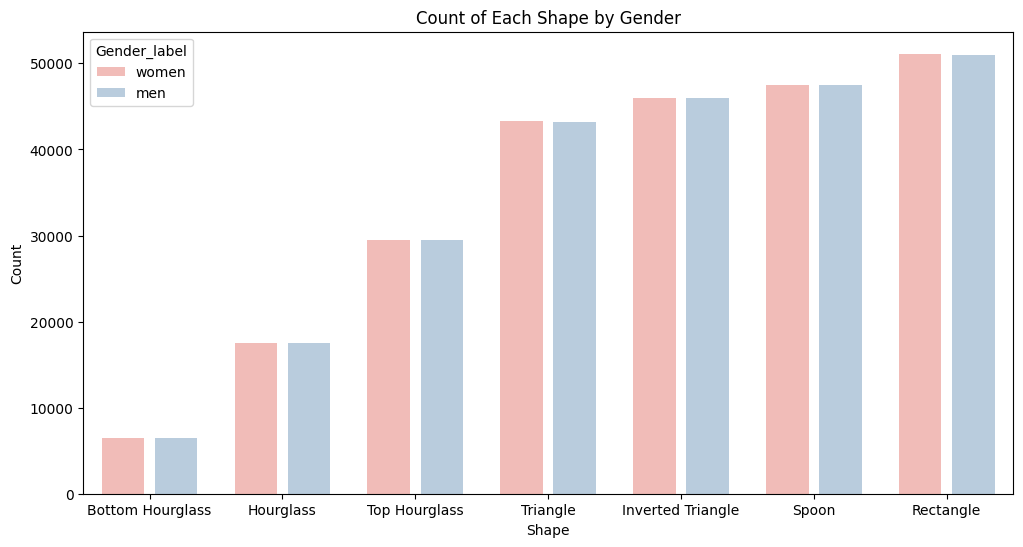

In [8]:
# Create new columns to show data
data['Gender_label'] = data['Gender']
data['Shape_label'] = data['Shape']

plt.figure(figsize=(12, 6))  # Increase the width of the figure to 10 inches
sns.countplot(data=data, x='Shape_label',
              palette='Pastel1',
              hue='Gender_label',
              order=data['Shape_label'].value_counts(ascending=True).index,
              gap=0.2)
plt.xlabel('Shape')
plt.ylabel('Count')
plt.title('Count of Each Shape by Gender')
plt.show()

# Drop the columns
data = data.drop(columns=['Gender_label','Shape_label'])

In [9]:
# data['Chest/Waist'] = data['Chest'] / data['Waist']
# data['Hip/Waist'] = data['Hip'] / data['Waist']
# data['Chest/Hip'] = data['Chest'] / data['Hip']
# data['Hip/High Hip'] = data['Hip'] / data['High']
# data

# Distribution of Measurements

In [10]:
data = data[(data['Chest'] <= 40) & (data['Chest'] >= 20)]
data = data[(data['Waist'] <= 40) & (data['Waist'] >= 20)]
data = data[(data['High'] <= 40) & (data['High'] >= 20)]
data = data[(data['Hip'] <= 40) & (data['Hip'] >= 20)]

### Rectangle

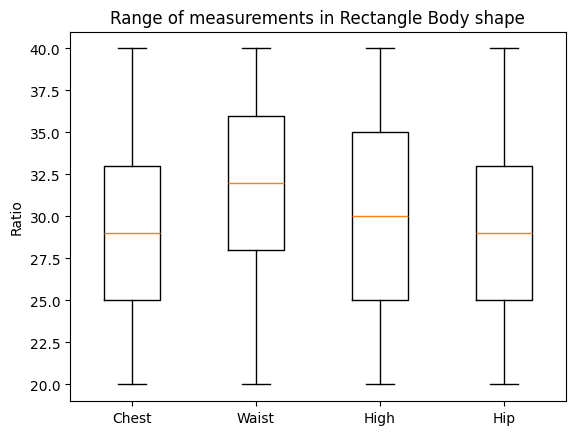

In [11]:
# Filter the data to only include rows where 'Shape' is Rectangle
shape_data = data[data['Shape'] == 'Rectangle']

# Create a box plot
plt.boxplot([shape_data['Chest'], shape_data['Waist'], shape_data['High'], shape_data['Hip']])

# Set the labels and title
plt.xticks([1, 2, 3, 4], ['Chest', 'Waist', 'High', 'Hip'])
plt.ylabel('Ratio')
plt.title('Range of measurements in Rectangle Body shape')

# Display the plot
plt.show()

### Triangle

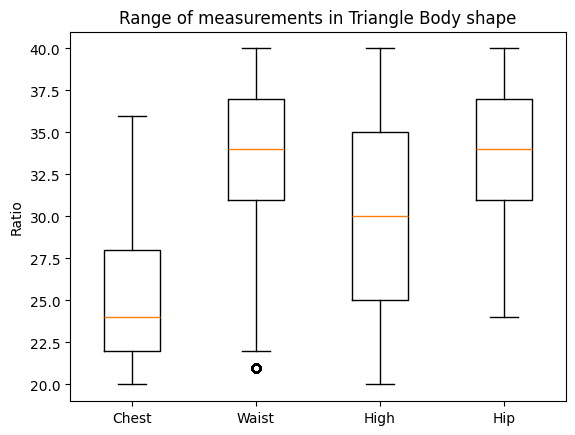

In [12]:
# Filter the data to only include rows where 'Shape' is Triangle
shape_data = data[data['Shape'] == 'Triangle']

# Create a box plot
plt.boxplot([shape_data['Chest'], shape_data['Waist'], shape_data['High'], shape_data['Hip']])

# Set the labels and title
plt.xticks([1, 2, 3, 4], ['Chest', 'Waist', 'High', 'Hip'])
plt.ylabel('Ratio')
plt.title('Range of measurements in Triangle Body shape')

# Display the plot
plt.show()

In [13]:
# print a row with triangle shape and waist = 34
print(data[(data['Chest'] == 25) & (data['Waist'] == 30) & (data['High'] == 25) & (data['Hip'] == 26)])

       Gender  Chest  Waist  High  Hip      Shape   WHR
285525    men     25     30    25   26  Rectangle  1.15
285526  women     25     30    25   26  Rectangle  1.15


### Inverted Triangle

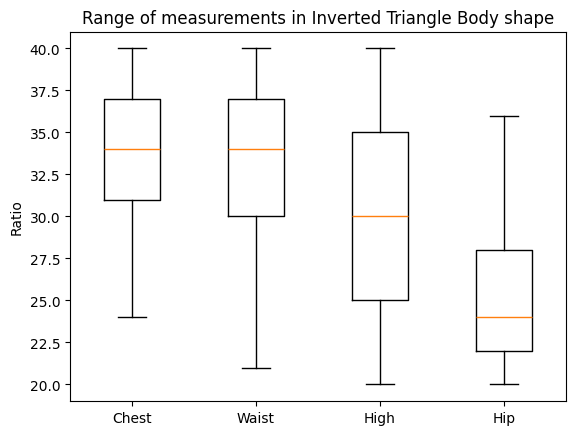

In [14]:
# Filter the data to only include rows where 'Shape' is Inverted Triangle
shape_data = data[data['Shape'] == 'Inverted Triangle']

# Create a box plot
plt.boxplot([shape_data['Chest'], shape_data['Waist'], shape_data['High'], shape_data['Hip']])

# Set the labels and title
plt.xticks([1, 2, 3, 4], ['Chest', 'Waist', 'High', 'Hip'])
plt.ylabel('Ratio')
plt.title('Range of measurements in Inverted Triangle Body shape')

# Display the plot
plt.show()

### Hourglass

#### Normal

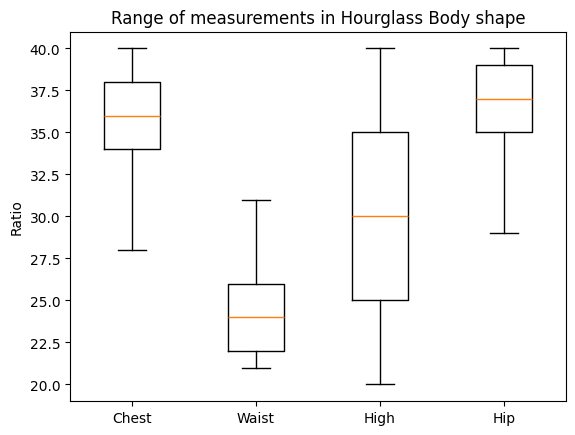

In [15]:
# Filter the data to only include rows where 'Shape' is Hourglass
shape_data = data[data['Shape'] == 'Hourglass']

# Create a box plot
plt.boxplot([shape_data['Chest'], shape_data['Waist'], shape_data['High'], shape_data['Hip']])

# Set the labels and title
plt.xticks([1, 2, 3, 4], ['Chest', 'Waist', 'High', 'Hip'])
plt.ylabel('Ratio')
plt.title('Range of measurements in Hourglass Body shape')

# Display the plot
plt.show()

#### Bottom

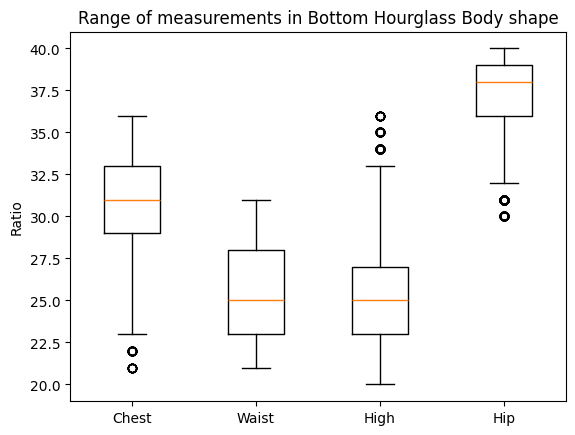

In [16]:
# Filter the data to only include rows where 'Shape' is Bottom Hourglass
shape_data = data[data['Shape'] == 'Bottom Hourglass']

# Create a box plot
plt.boxplot([shape_data['Chest'], shape_data['Waist'], shape_data['High'], shape_data['Hip']])

# Set the labels and title
plt.xticks([1, 2, 3, 4], ['Chest', 'Waist', 'High', 'Hip'])
plt.ylabel('Ratio')
plt.title('Range of measurements in Bottom Hourglass Body shape')

# Display the plot
plt.show()

#### Top

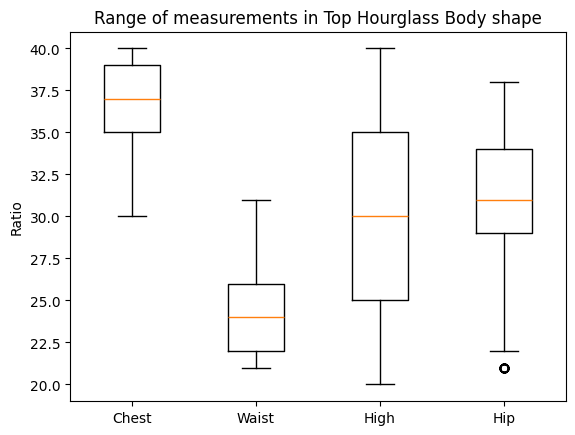

In [17]:
# Filter the data to only include rows where 'Shape' is Top Hourglass
shape_data = data[data['Shape'] == 'Top Hourglass']

# Create a box plot
plt.boxplot([shape_data['Chest'], shape_data['Waist'], shape_data['High'], shape_data['Hip']])

# Set the labels and title
plt.xticks([1, 2, 3, 4], ['Chest', 'Waist', 'High', 'Hip'])
plt.ylabel('Ratio')
plt.title('Range of measurements in Top Hourglass Body shape')

# Display the plot
plt.show()

In [18]:
# # Drop outliers in Top Hourglass body shape data
# data = data.drop(data[(data['Shape'] == 'Top Hourglass') & (data['Waist'] < 20)].index)
# data = data.drop(data[(data['Shape'] == 'Top Hourglass') & (data['Hip'] < 20)].index)

# # Filter the data to only include rows where 'Shape' is Top Hourglass
# shape_data = data[data['Shape'] == 'Top Hourglass']

# # Create a box plot
# plt.boxplot([shape_data['Chest'], shape_data['Waist'], shape_data['High'], shape_data['Hip']])

# # Set the labels and title
# plt.xticks([1, 2, 3, 4], ['Chest', 'Waist', 'High', 'Hip'])
# plt.ylabel('Ratio')
# plt.title('Range of measurements in Top Hourglass Body shape')

# # Display the plot
# plt.show()

### Spoon

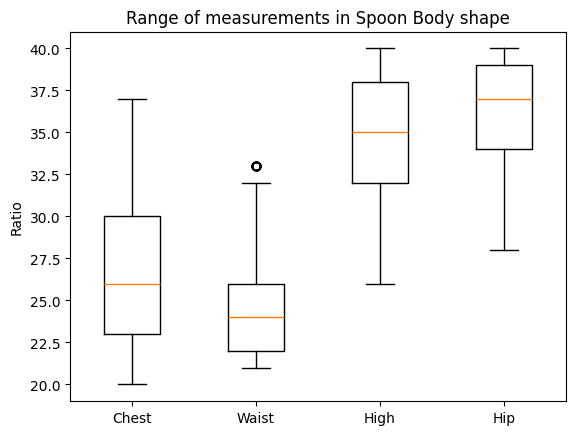

In [19]:
# Filter the data to only include rows where 'Shape' is Spoon
shape_data = data[data['Shape'] == 'Spoon']

# Create a box plot
plt.boxplot([shape_data['Chest'], shape_data['Waist'], shape_data['High'], shape_data['Hip']])

# Set the labels and title
plt.xticks([1, 2, 3, 4], ['Chest', 'Waist', 'High', 'Hip'])
plt.ylabel('Ratio')
plt.title('Range of measurements in Spoon Body shape')

# Display the plot
plt.show()

# Model creation: Random Forest

In [20]:
# Change male to 0 and female to 1 in Gender column
data['Gender'] = data['Gender'].replace({'men': 0, 'women': 1})

# Change Shape column to categorical
# data = data.drop(columns=['Chest', 'Waist', 'High', 'Hip'])

In [21]:
from sklearn.model_selection import StratifiedKFold

# 'Shape' is target variable and the rest are features
X = data.drop(columns=['Shape'])
y = data['Shape']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=24104122)
clf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24104122)


In [22]:
from sklearn.metrics import accuracy_score, f1_score
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
bf_acc = accuracy_score(y_train, y_pred)*100
bf_f1 = f1_score(y_train, y_pred, average='weighted')*100
print(f'Accuracy: {bf_acc:.2f}%')
print(f'F1 Score: {bf_f1:.2f}%')

Accuracy: 100.00%
F1 Score: 100.00%


# Import Model

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294283 entries, 472435 to 355106
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Gender  294283 non-null  int64  
 1   Chest   294283 non-null  int64  
 2   Waist   294283 non-null  int64  
 3   High    294283 non-null  int64  
 4   Hip     294283 non-null  int64  
 5   WHR     294283 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 15.7 MB


In [24]:
import numpy as np
import pickle
# Save to file in the current working directory
pkl_filename = "bodyshape_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

# Define the new data
new_data = np.array([[1, 25, 30, 25, 26]])

# Calculate the waist/hip ratio
waist_hip = new_data[0][2] / new_data[0][3]

# Add the new value to the array
new_data = np.append(new_data, [[waist_hip]], axis=1)

# Use the loaded pickled model to make predictions
new_pred = pickle_model.predict(new_data)

print(new_pred)

['Rectangle']


c:\Users\nhii\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
